In [1]:
from IPython.display import display

import numpy as np
import pandas as pd
import datetime
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

value    16
dtype: int64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2014-02-14 14:30:00 to 2014-02-28 14:25:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


None

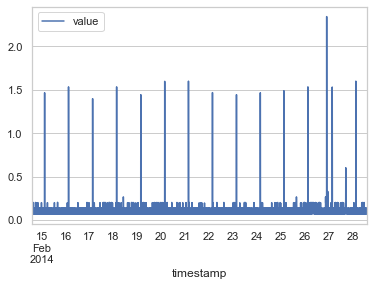

In [3]:
df = pd.read_csv('./realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv', parse_dates=['timestamp'])
df.index = df.timestamp
df.drop(columns=['timestamp'], inplace=True)
df.plot()
display(df[df['value'] > 0.4].count())
display(df.info())

<AxesSubplot:xlabel='timestamp'>

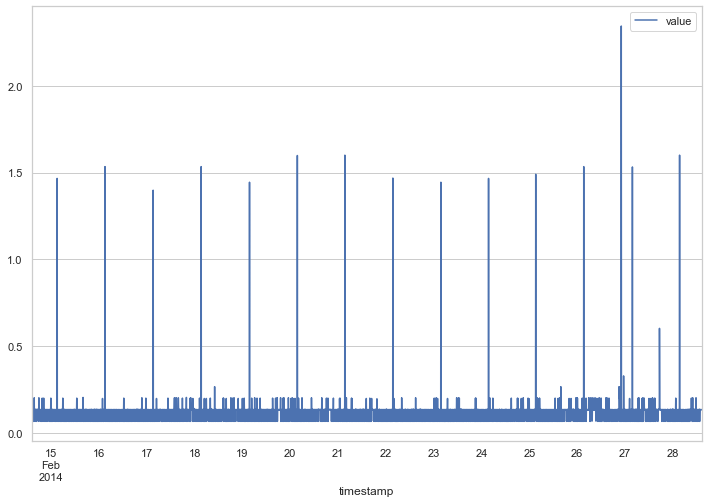

In [10]:
df.plot()

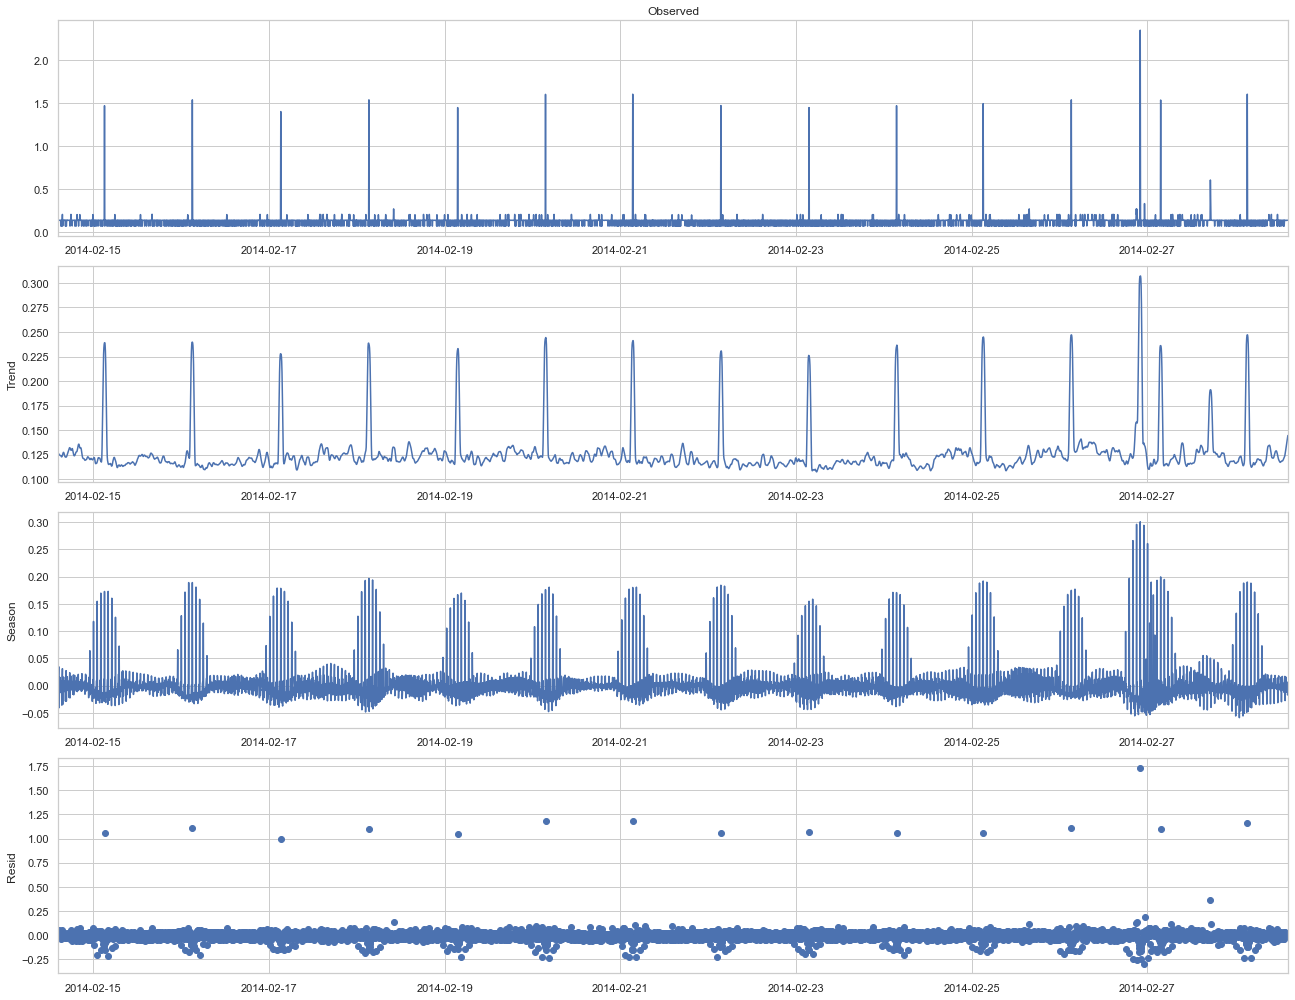

In [6]:
res = STL(df, seasonal=13, period=12).fit()
plt.rcParams['figure.figsize'] = [18, 14]
ax=res.plot()
plt.show()

In [7]:
!ls ./realTraffic

TravelTime_387.csv
TravelTime_451.csv
occupancy_6005.csv
occupancy_t4013.csv
speed_6005.csv
speed_7578.csv
speed_t4013.csv


<AxesSubplot:xlabel='timestamp'>

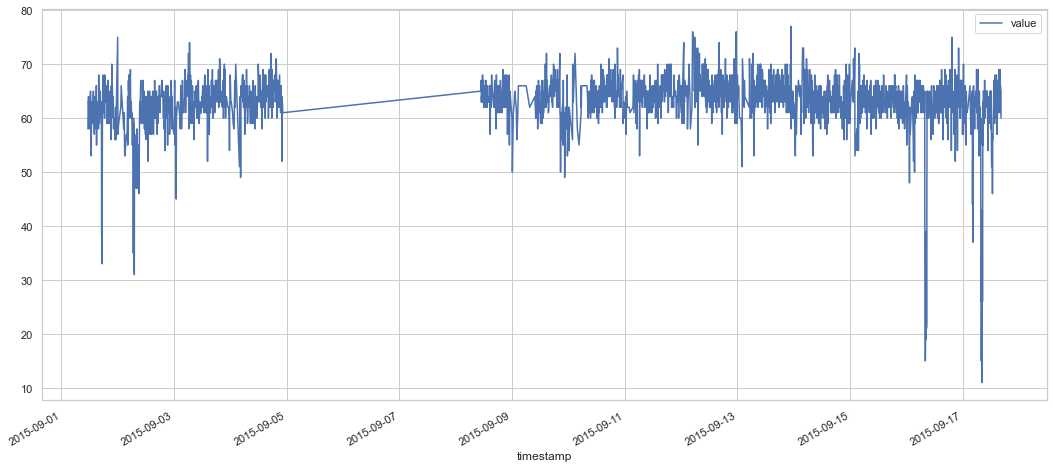

In [11]:
df = pd.read_csv('./realTraffic/speed_t4013.csv', parse_dates=['timestamp'])
df.index = df.timestamp
df.drop(columns=['timestamp'], inplace=True)
plt.rcParams['figure.figsize'] = [18, 8]
df.plot()

In [12]:
df['ind'] = np.arange(len(df))
display(df.info())
display(df.iloc[50])
display(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2495 entries, 2015-09-01 11:25:00 to 2015-09-17 16:19:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   2495 non-null   int64
 1   ind     2495 non-null   int32
dtypes: int32(1), int64(1)
memory usage: 48.7 KB


None

value    60
ind      50
Name: 2015-09-01 16:45:00, dtype: int64

,value,ind
timestamp,,
2015-09-01 11:25:00,58,0
2015-09-01 11:30:00,63,1
2015-09-01 11:35:00,63,2
2015-09-01 11:40:00,64,3
2015-09-01 11:55:00,58,4


value     61
ind      640
Name: 2015-09-04 22:23:00, dtype: int64

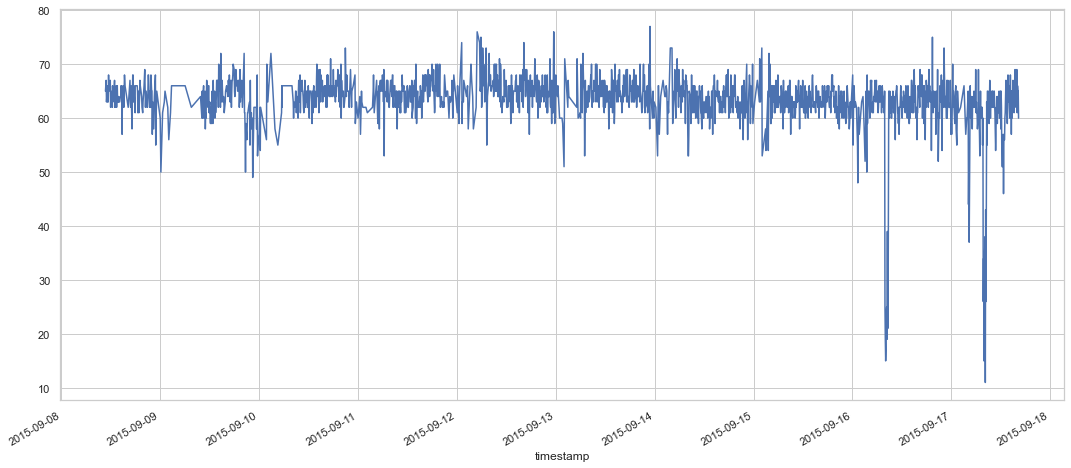

In [13]:
time_obj = datetime.datetime.strptime('15-09-04 22:23:00', '%y-%m-%d %H:%M:%S')
display(df.loc[time_obj])
df = df.iloc[641:]
df['value'].plot()
df.drop(columns=['ind'], inplace=True)

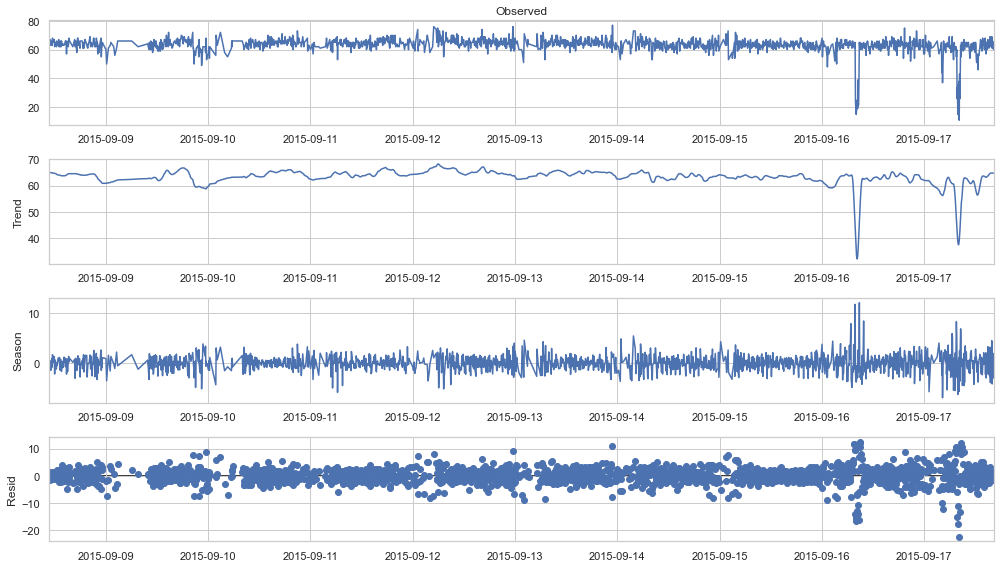

In [14]:
res = STL(df, seasonal=7, period=12).fit()
plt.rcParams['figure.figsize'] = [14, 8]
ax=res.plot()
plt.show()

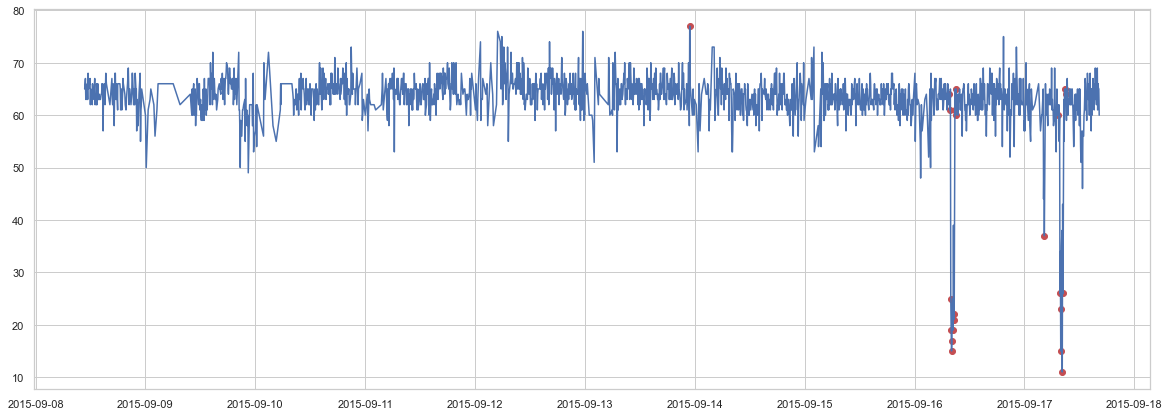

In [15]:
th = 10
outliers_ind = np.where(res.resid.abs() > th)
outlier_values = df.iloc[outliers_ind]
plt.figure(figsize=(20, 7))
plt.plot(df.index, df["value"], color = "b")
# plot outlier values
plt.scatter(outlier_values.index, outlier_values["value"], color = "r")